# Project 2
## Data Cleaning

In [445]:
#set up imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math as mt

In [446]:
#read in data
train = pd.read_csv('./datasets/train.csv')

In [447]:
#sample the data
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [448]:
train.shape

(2051, 81)

In [449]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
Id                 2051 non-null int64
PID                2051 non-null int64
MS SubClass        2051 non-null int64
MS Zoning          2051 non-null object
Lot Frontage       1721 non-null float64
Lot Area           2051 non-null int64
Street             2051 non-null object
Alley              140 non-null object
Lot Shape          2051 non-null object
Land Contour       2051 non-null object
Utilities          2051 non-null object
Lot Config         2051 non-null object
Land Slope         2051 non-null object
Neighborhood       2051 non-null object
Condition 1        2051 non-null object
Condition 2        2051 non-null object
Bldg Type          2051 non-null object
House Style        2051 non-null object
Overall Qual       2051 non-null int64
Overall Cond       2051 non-null int64
Year Built         2051 non-null int64
Year Remod/Add     2051 non-null int64
Roof Style         20

In [450]:
train.isnull().sum()

Id                0
PID               0
MS SubClass       0
MS Zoning         0
Lot Frontage    330
               ... 
Misc Val          0
Mo Sold           0
Yr Sold           0
Sale Type         0
SalePrice         0
Length: 81, dtype: int64

### Correct 'Lot Frontage'

The first observation is there are 330 missing values in 'Lot Frontage' these will need to be replaced with something.

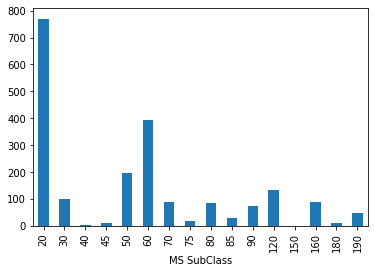

In [451]:
# Plot the MS SubClass to get an idea of the number of different types of homes in the sample.
train.groupby('MS SubClass').count()['Id'].plot.bar()

In [452]:
train.groupby('MS SubClass').count()['Id']

MS SubClass
20     770
30     101
40       4
45      11
50     198
60     394
70      90
75      16
80      86
85      28
90      75
120    132
150      1
160     88
180     11
190     46
Name: Id, dtype: int64

In [453]:
#Create a new df with just 'MS SubClass' and the median 'Lot Frontage'
median_lf = train.groupby('MS SubClass').median()['Lot Frontage']
#convert this new df into a dictionary so it is easily referenced
median_lf = dict(median_lf)

In [454]:
train[train['MS SubClass'] == 150]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
1515,2731,905351045,150,RL,NaN,1700,Pave,NaN,Reg,HLS,...,200,0,NaN,NaN,NaN,0,4,2006,WD,148400


In [455]:
#the 'Lot Frontage' for 'MS Subclass' 150 wil be the average of the median scores of 'MS SubClass' 120 and 160
#(43 + 24)/ 2
##consider making the 'Lot Frontage' 21 because row Id 1044 has a very similar lot area 21.0	1680
#make the value change using iloc
train.iloc[1515,4] = (43 + 24)/ 2
#verify change was made
train.iloc[1515,4]

33.5

In [456]:
#math is nan method found on Stack Overflow at: 
#https://stackoverflow.com/questions/944700/how-can-i-check-for-nan-values
mt.isnan(train.iloc[0,4])

True

In [457]:
# systematically replace null 'Lot Frontage' values with the 'MS Subclass' median 'Lot Frontage' value
#iterate over the entrie df
for i in range(len(train)): 
#check to see if 'Lot Frontage' is null
    if mt.isnan(train.iloc[i,4]):
        x = train.iloc[i,2]
#if null replace with the median 'Lot Frontage' value found in the dictionary 'median_lf'
        train.iloc[i,4] = median_lf[x]


In [458]:
#check to see that there are no longer any null values in the 'Lot Frontage' column
train['Lot Frontage'].isnull().sum()

0

### Correct 'Alley' Column

In [459]:
train['Alley'].count()/len(train)

0.06825938566552901

Less than 7% of the data contains alley information. The data dictionary explains there can be three values, "Gravel", "Paved", or "No alley access". Given the slight difference between gravel and paved alley versus the huge differenc of either having or not having an alley access, I have decided to change this column to boolean type. **1 = house has alley access, 0 = house does not have alley access**

In [460]:
# systematically replace null 'Alley' values with 0 and any other value with 1
#iterate over the entrie df
for i in range(len(train)): 
#check to see if 'Alley' is null
    if pd.isnull(train.iloc[i,7]):
#if null replace with 0
        train.iloc[i,7] = 0
#otherwise replace with 1
    else:
        train.iloc[i,7] = 1

In [461]:
#verify there are no longer any null values in the 'Alley' column
train['Alley'].isnull().sum()

0

### Correct 'Mas Vnr Type' and 'Mas Vnr Area'

In [462]:
train['Mas Vnr Type'].value_counts()

None       1218
BrkFace     630
Stone       168
BrkCmn       13
Name: Mas Vnr Type, dtype: int64

In [463]:
train[train['Mas Vnr Type'].isnull()][['Exterior 1st','Exterior 2nd','Mas Vnr Type','Mas Vnr Area']]

,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area
22,CemntBd,CmentBd,NaN,NaN
41,VinylSd,VinylSd,NaN,NaN
86,VinylSd,VinylSd,NaN,NaN
212,VinylSd,VinylSd,NaN,NaN
276,VinylSd,VinylSd,NaN,NaN
338,WdShing,Wd Shng,NaN,NaN
431,VinylSd,VinylSd,NaN,NaN
451,VinylSd,VinylSd,NaN,NaN
591,VinylSd,VinylSd,NaN,NaN
844,VinylSd,VinylSd,NaN,NaN


In [464]:
train[train['Mas Vnr Type'] == 'None'][['Exterior 1st','Exterior 2nd','Mas Vnr Type','Mas Vnr Area']]

,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area
2,VinylSd,VinylSd,None,0.0
3,VinylSd,VinylSd,None,0.0
4,Wd Sdng,Plywood,None,0.0
5,BrkFace,Plywood,None,0.0
8,Wd Sdng,Wd Sdng,None,0.0
...,...,...,...,...
2046,VinylSd,VinylSd,None,0.0
2047,VinylSd,VinylSd,None,0.0
2048,BrkFace,Stone,None,0.0
2049,Plywood,Plywood,None,0.0


It appears the 'Mas Vnr Type' and 'Mas Vnr Area' null values should have been entered in as None like many of the other homes. All of the 22 null values are either vinyl siding or cement board siding, neither of which appear to have any brick or stone vaneer. These null values will be changed to None for type and 0 for area. 

In [465]:
# systematically replace null 'Mas Vnr Type' values with None 
#iterate over the entrie df
for i in range(len(train)): 
#check to see if 'Mas Vnr Type' is null (index 26)
    if pd.isnull(train.iloc[i,26]):
#if null replace with 'None'
        train.iloc[i,26] = 'None'

In [466]:
# systematically replace null 'Mas Vnr Area' values with 0 
#iterate over the entrie df
for i in range(len(train)): 
#check to see if 'Mas Vnr Area' is null (index 27)
    if pd.isnull(train.iloc[i,27]):
#if null replace with 0
        train.iloc[i,27] = 0

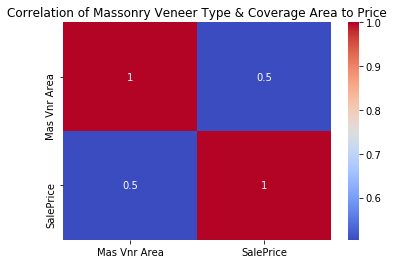

In [467]:
sns.heatmap(train[['Mas Vnr Type','Mas Vnr Area','SalePrice']].corr(),
           annot = True,
           cmap = 'coolwarm');
plt.title('Correlation of Massonry Veneer Type & Coverage Area to Price');

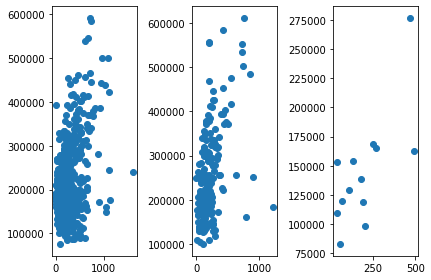

In [468]:
plt.subplot(1,3,1)
plt.scatter(train[train['Mas Vnr Type'] == 'BrkFace']['Mas Vnr Area'],train[train['Mas Vnr Type'] == 'BrkFace']['SalePrice'])

plt.subplot(1,3,2)
plt.scatter(train[train['Mas Vnr Type'] == 'Stone']['Mas Vnr Area'],train[train['Mas Vnr Type'] == 'Stone']['SalePrice'])

plt.subplot(1,3,3)
plt.scatter(train[train['Mas Vnr Type'] == 'BrkCmn']['Mas Vnr Area'],train[train['Mas Vnr Type'] == 'BrkCmn']['SalePrice'])

plt.tight_layout()

#plotting help from stack overflow post: https://stackoverflow.com/questions/42818361/how-to-make-two-plots-side-by-side-using-python

### Basement Analysis - Remove Nulls

First, seperate the basement features and check for null values. 

In [469]:
#filter df by basement values and count null values
train[['Bsmt Qual','Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 
'BsmtFin SF 1','BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 
'Total Bsmt SF','Bsmt Full Bath','Bsmt Half Bath']].isnull().sum()

Bsmt Qual         55
Bsmt Cond         55
Bsmt Exposure     58
BsmtFin Type 1    55
BsmtFin SF 1       1
BsmtFin Type 2    56
BsmtFin SF 2       1
Bsmt Unf SF        1
Total Bsmt SF      1
Bsmt Full Bath     2
Bsmt Half Bath     2
dtype: int64

Interestingly, 'Total Bsmt SF' only has one null value which could mean that many of the homes simply do not have basements and therefore whoever input the data skipped over the basement section entirely, creating many null values. To investigate this filter the df by 'Total Bsmt SF' = 0.

In [470]:
train[train['Total Bsmt SF'] == 0].count()

Id              54
PID             54
MS SubClass     54
MS Zoning       54
Lot Frontage    54
                ..
Misc Val        54
Mo Sold         54
Yr Sold         54
Sale Type       54
SalePrice       54
Length: 81, dtype: int64

There are 54 homes with no basements and many null values. 

In [471]:
train[train['Total Bsmt SF'] == 0][['Bsmt Qual','Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 
'BsmtFin SF 1','BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 
'Total Bsmt SF','Bsmt Full Bath','Bsmt Half Bath']].head(5)

,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Bsmt Full Bath,Bsmt Half Bath
12,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
93,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
114,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
146,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
183,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0


The column 'Bsmt Qual' is supposed to contain up to six values indicating the basement quality of the home. Running a groupby count below it is evident that the 'NA' option meaning "no basement" was never used. This 'NA' category needs to be applied to all of the null values in 'Bsmt Qual'.

In [472]:
train.groupby('Bsmt Qual').count()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
Bsmt Qual,,,,,,,,,,,,,,,,,,,,,
Ex,184,184,184,184,184,184,184,184,184,184,...,184,184,1,2,1,184,184,184,184,184
Fa,60,60,60,60,60,60,60,60,60,60,...,60,60,0,15,3,60,60,60,60,60
Gd,864,864,864,864,864,864,864,864,864,864,...,864,864,4,107,23,864,864,864,864,864
Po,1,1,1,1,1,1,1,1,1,1,...,1,1,0,0,0,1,1,1,1,1
TA,887,887,887,887,887,887,887,887,887,887,...,887,887,3,270,35,887,887,887,887,887


In [473]:
# systematically replace null basement fields values with 'NA' 
#iterate over the entrie df
for i in range(len(train)): 
#check to see if 'Bsmt Qual' is null (index 31)
    if pd.isnull(train.iloc[i,31]):
#if null replace 'Bsmt Qual' with 'NA'
        train.iloc[i,31] = 'NA'
#replace 'Bsmt Cond' with 'NA'
        train.iloc[i,32] = 'NA'
#replace 'Bsmt Exposure' with 'NA'
        train.iloc[i,33] = 'NA'
#replace 'BsmtFin Type 1' with 'NA'
        train.iloc[i,34] = 'NA'
#replace 'BsmtFin Type 2' with 'NA'
        train.iloc[i,36] = 'NA'

In [474]:
#check for remaining null values in the basement fields
train[['Bsmt Qual','Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 
'BsmtFin SF 1','BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 
'Total Bsmt SF','Bsmt Full Bath','Bsmt Half Bath']].isnull().sum()

Bsmt Qual         0
Bsmt Cond         0
Bsmt Exposure     3
BsmtFin Type 1    0
BsmtFin SF 1      1
BsmtFin Type 2    1
BsmtFin SF 2      1
Bsmt Unf SF       1
Total Bsmt SF     1
Bsmt Full Bath    2
Bsmt Half Bath    2
dtype: int64

In [475]:
#Isolate the null values in 'Bsmt Exposure'
train[train['Bsmt Exposure'].isnull()][['Bsmt Qual','Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 
'BsmtFin SF 1','BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 
'Total Bsmt SF','Bsmt Full Bath','Bsmt Half Bath']]

,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Bsmt Full Bath,Bsmt Half Bath
1456,Gd,TA,NaN,Unf,0.0,Unf,0.0,725.0,725.0,0.0,0.0
1547,Gd,TA,NaN,Unf,0.0,Unf,0.0,1595.0,1595.0,0.0,0.0
1997,Gd,TA,NaN,Unf,0.0,Unf,0.0,936.0,936.0,0.0,0.0


In [476]:
#filter the df by 'Bsmt Qual' and 'BsmtFin Type 1' and count the number of intenses of 'Bsmt Exposure' types
train[(train['Bsmt Qual'] == 'Gd') & (train['BsmtFin Type 1'] == 'Unf')]['Bsmt Exposure'].value_counts()

No    189
Av     46
Mn     14
Gd     10
Name: Bsmt Exposure, dtype: int64

Looking at the above two cells all three of the null values in 'Bsmt Exposure' column are of good quality and are unfinished. Based on the filter results, the large majority of homes that share both good quality and unfinished basements also have "No Exposure" or 'No'. Thus the three null values will be assumed to be 'No' and changed to reflect a 'No' value.  

In [477]:
#using iloc and the indexes form the initial null search above the value for 'Bsmt Exposure' will be changed to 'No'
#replace 'Bsmt Exposure' with 'No'
train.iloc[1456,33] = 'No'
train.iloc[1547,33] = 'No'
train.iloc[1997,33] = 'No'

In [478]:
#check for remaining null values in the basement fields
train[['Bsmt Qual','Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 
'BsmtFin SF 1','BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 
'Total Bsmt SF','Bsmt Full Bath','Bsmt Half Bath']].isnull().sum()

Bsmt Qual         0
Bsmt Cond         0
Bsmt Exposure     0
BsmtFin Type 1    0
BsmtFin SF 1      1
BsmtFin Type 2    1
BsmtFin SF 2      1
Bsmt Unf SF       1
Total Bsmt SF     1
Bsmt Full Bath    2
Bsmt Half Bath    2
dtype: int64

In [479]:
#Isolate the null value in 'BsmtFin SF 1'
train[train['BsmtFin SF 1'].isnull()][['Bsmt Qual','Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 
'BsmtFin SF 1','BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 
'Total Bsmt SF','Bsmt Full Bath','Bsmt Half Bath']]

,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Bsmt Full Bath,Bsmt Half Bath
1327,NA,NA,NA,NA,NaN,NA,NaN,NaN,NaN,NaN,NaN


It appears index 1327 contains 6 of the remaining null values. Because 'Bsmt Qual' = 'NA' there is no basement in this home. All of the null values can be changed to reflect that. This is done in the cell below. 

In [480]:
#using iloc the null values are replaced to reflect 'no basement' with the proper data types used for each column
    
#'BsmtFin SF 1' 
train.iloc[1327,35] = 0
#'BsmtFin SF 2'
train.iloc[1327,37] = 0
#'Bsmt Unf SF'
train.iloc[1327,38] = 0
#'Total Bsmt SF'
train.iloc[1327,39] = 0
#'Bsmt Full Bath'
train.iloc[1327,48] = 0
#'Bsmt Half Bath'
train.iloc[1327,49] = 0

In [481]:
#check for remaining null values in the basement fields
train[['Bsmt Qual','Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 
'BsmtFin SF 1','BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 
'Total Bsmt SF','Bsmt Full Bath','Bsmt Half Bath']].isnull().sum()

Bsmt Qual         0
Bsmt Cond         0
Bsmt Exposure     0
BsmtFin Type 1    0
BsmtFin SF 1      0
BsmtFin Type 2    1
BsmtFin SF 2      0
Bsmt Unf SF       0
Total Bsmt SF     0
Bsmt Full Bath    1
Bsmt Half Bath    1
dtype: int64

In [482]:
#Isolate the null value in 'BsmtFin Type 2'
train[train['BsmtFin Type 2'].isnull()][['Bsmt Qual','Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 
'BsmtFin SF 1','BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 
'Total Bsmt SF','Bsmt Full Bath','Bsmt Half Bath']]

,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Bsmt Full Bath,Bsmt Half Bath
1147,Gd,TA,No,GLQ,1124.0,NaN,479.0,1603.0,3206.0,1.0,0.0


In [483]:
#filter the df by 'Bsmt Qual' and 'BsmtFin Type 1' and count the number of intenses of 'Bsmt Exposure' types
train[(train['BsmtFin Type 1'] == 'GLQ')]['BsmtFin Type 2'].value_counts()

Unf    569
Rec     17
LwQ     11
ALQ     11
BLQ      6
Name: BsmtFin Type 2, dtype: int64

Based on the above two cells the null value for 'BsmtFin Type 2' at index 1147 will be assumed to be 'Rec' or "Average Rec Room" because that is the most common 2nd basement finish type in this df second only to 'Unf' which is unfinished. The null value cannot be assumed to be unfinished space because there is already unfinished square footage accounted for in 'Bsmt Unf SF'. 

In [484]:
#replace null with 'Rec' using iloc
train.iloc[1147,36] = 'Rec'

In [485]:
#check for remaining null values in the basement fields
train[['Bsmt Qual','Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 
'BsmtFin SF 1','BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 
'Total Bsmt SF','Bsmt Full Bath','Bsmt Half Bath']].isnull().sum()

Bsmt Qual         0
Bsmt Cond         0
Bsmt Exposure     0
BsmtFin Type 1    0
BsmtFin SF 1      0
BsmtFin Type 2    0
BsmtFin SF 2      0
Bsmt Unf SF       0
Total Bsmt SF     0
Bsmt Full Bath    1
Bsmt Half Bath    1
dtype: int64

In [486]:
#Isolate the null value in 'Bsmt Half Bath'
train[train['Bsmt Half Bath'].isnull()][['Bsmt Qual','Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 
'BsmtFin SF 1','BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 
'Total Bsmt SF','Bsmt Full Bath','Bsmt Half Bath']]

,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Bsmt Full Bath,Bsmt Half Bath
616,NA,NA,NA,NA,0.0,NA,0.0,0.0,0.0,NaN,NaN


The remaining two null values at index 616 are for 'Bsmt Full Bath' and 'Bsmt Half Bath'. This home has no basement. These values will be changed to 0. 

In [487]:
#replace null values using iloc at index 616
#'Bsmt Full Bath'
train.iloc[616,48] = 0
#'Bsmt Half Bath'
train.iloc[616,49] = 0

In [488]:
#Enusre all null in the basement section have been removed. 
train[['Bsmt Qual','Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 
'BsmtFin SF 1','BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 
'Total Bsmt SF','Bsmt Full Bath','Bsmt Half Bath']].isnull().sum()

Bsmt Qual         0
Bsmt Cond         0
Bsmt Exposure     0
BsmtFin Type 1    0
BsmtFin SF 1      0
BsmtFin Type 2    0
BsmtFin SF 2      0
Bsmt Unf SF       0
Total Bsmt SF     0
Bsmt Full Bath    0
Bsmt Half Bath    0
dtype: int64

### Fireplace Analysis - Remove Nulls

In [489]:
#check for null values in the fireplace categories
train[['Fireplaces','Fireplace Qu']].isnull().sum()

Fireplaces         0
Fireplace Qu    1000
dtype: int64

In [490]:
f"There are {train[train['Fireplaces'] == 0].count()['Id']} homes that have no fireplaces"

'There are 1000 homes that have no fireplaces'

In [491]:
f"There are {train[train['Fireplace Qu'] == 'NA'].count()['Id']} homes in the data frame with 'NA' indicated for fireplace"

"There are 0 homes in the data frame with 'NA' indicated for fireplace"

The homes will null values in the 'Fireplace Qu' have no fireplaces, the value will be changed to 0. 

In [492]:
#iterate through the df replacing null values in 'Fireplace Qu' with 0
for i in range(len(train)):
    if pd.isnull(train.iloc[i,58]):
        train.iloc[i,58] = 0

In [493]:
#ensure all null values for fireplaces were removed
train[['Fireplaces','Fireplace Qu']].isnull().sum()

Fireplaces      0
Fireplace Qu    0
dtype: int64

### Garage Analysis - Remove Nulls

In [494]:
train[['Garage Type', 'Garage Yr Blt','Garage Finish', 'Garage Cars', 'Garage Area', 'Garage Qual',
      'Garage Cond', 'Paved Drive']].isnull().sum()

Garage Type      113
Garage Yr Blt    114
Garage Finish    114
Garage Cars        1
Garage Area        1
Garage Qual      114
Garage Cond      114
Paved Drive        0
dtype: int64

Looking at the above list of null values there are multiple catagories with roughly 114 null values. This might indicate that homes with no garage were incorrectly entered and instead of 'NA' being entered the column was left blank. (this has happened throughout the data frame)

In [495]:
f"There are {train[train['Garage Type'] == 'NA'].count()['Id']} homes in the data frame with 'NA' indicated for Garage"

"There are 0 homes in the data frame with 'NA' indicated for Garage"

There are no homes with 'NA' or "No Garage" as the garage type. It will be assumed that all null values in the garage section are a result of leaving the column blank when no garage was present. The below code replaces each category with the proper data type for each column.  

In [496]:
# systematically replace null garage fields values with 'NA' or similar
#iterate over the entrie df
for i in range(len(train)): 
#check to see if 'Garage Type' is null (index 31)
    if pd.isnull(train.iloc[i,59]):
#if null replace 'Garage Type' with 'NA'
        train.iloc[i,59] = 'NA'
#replace 'Garage Yr Blt' with 0 (set as zero only to maintain float64 data type, not a great value long term)
        train.iloc[i,60] = 0
#replace 'Garage Finish' with 'NA'
        train.iloc[i,61] = 'NA'
#replace 'Garage Qual' with 'NA'
        train.iloc[i,64] = 'NA'
#replace 'Garage Cond' with 'NA'
        train.iloc[i,65] = 'NA'

In [497]:
#Check to see null values were removed
train[['Garage Type', 'Garage Yr Blt','Garage Finish', 'Garage Cars', 'Garage Area', 'Garage Qual',
      'Garage Cond', 'Paved Drive']].isnull().sum()

Garage Type      0
Garage Yr Blt    1
Garage Finish    1
Garage Cars      1
Garage Area      1
Garage Qual      1
Garage Cond      1
Paved Drive      0
dtype: int64

In [498]:
#isolate the remaining nulls values 
#(they are likely all associated with one home that does not have a garage but was incorrectly marked)
train[train['Garage Yr Blt'].isnull()][['Garage Type', 'Garage Yr Blt','Garage Finish', 'Garage Cars', 'Garage Area', 'Garage Qual',
      'Garage Cond', 'Paved Drive']]

,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive
1712,Detchd,NaN,NaN,NaN,NaN,NaN,NaN,Y


In [499]:
#It is assumed this home does not have a garage. The null values will be replaced to reflect no garage as before. 
#replace 'Garage Type' with 'NA'
train.iloc[1712,59] = 'NA'
#replace 'Garage Yr Blt' with 0 (set as zero only to maintain float64 data type, not a great value long term)
train.iloc[1712,60] = 0
#replace 'Garage Finish' with 'NA'
train.iloc[1712,61] = 'NA'
#replace 'Garage Cars' with 0
train.iloc[1712,62] = 0
#replace 'Garage Area' with 0
train.iloc[1712,63] = 0
#replace 'Garage Qual' with 'NA'
train.iloc[1712,64] = 'NA'
#replace 'Garage Cond' with 'NA'
train.iloc[1712,65] = 'NA'

In [500]:
#Ensure all null values in the garage section have been removed
train[['Garage Type', 'Garage Yr Blt','Garage Finish', 'Garage Cars', 'Garage Area', 'Garage Qual',
      'Garage Cond', 'Paved Drive']].isnull().sum()

Garage Type      0
Garage Yr Blt    0
Garage Finish    0
Garage Cars      0
Garage Area      0
Garage Qual      0
Garage Cond      0
Paved Drive      0
dtype: int64

### Pool Analysis

In [501]:
#check for null values in the pool categories
train[['Pool Area','Pool QC']].isnull().sum()

Pool Area       0
Pool QC      2042
dtype: int64

In [502]:
f"There are {train[train['Pool Area'] == 0]['Id'].count()} homes without pools"

'There are 2042 homes without pools'

'Pool QC' or "Pool Quality" appears to not have been entered if the home had no pool. For homes that have a 'Pool Area' of 0, the 'Pool QC' will be assumed to be 'NA' or "No Pool".

In [503]:
#iterate through the df replacing null values in 'Pool QC' with 'NA'
for i in range(len(train)):
    if pd.isnull(train.iloc[i,73]):
        train.iloc[i,73] = 'NA'

In [504]:
#ensure all null values in pool categories have been removed
train[['Pool Area']].isnull().sum()

Pool Area    0
dtype: int64

### Fence Analysis

In [505]:
#echeck non-null values in fence category
train[['Fence']].notnull().sum()

Fence    400
dtype: int64

In [506]:
#Look at the types od fence recorded
train['Fence'].value_counts()

MnPrv    227
GdPrv     83
GdWo      80
MnWw      10
Name: Fence, dtype: int64

Once again, there are no 'NA' or "No Fence" values in the fence category. All null values will be assumed to be 'NA'

In [507]:
#iterate through the df replacing null values in 'Fence' with 'NA'
for i in range(len(train)):
    if pd.isnull(train.iloc[i,74]):
        train.iloc[i,74] = 'NA'

In [508]:
#ensure all null values have been removed from 'fence' column
train[['Fence']].isnull().sum()

Fence    0
dtype: int64

### Misc. Features Analysis

In [509]:
#check for null values in 'Misc Feature' column
train[['Misc Feature']].isnull().sum()

Misc Feature    1986
dtype: int64

In [510]:
#examine the types of features in 'Misc Feature'
train['Misc Feature'].value_counts()

Shed    56
Gar2     4
Othr     3
TenC     1
Elev     1
Name: Misc Feature, dtype: int64

Once again, there are no 'NA' or "None" values in the 'Misc Feature' category. All null values will be assumed to be 'NA'

In [511]:
#iterate through the df replacing null values in 'Misc Feature' with 'NA'
for i in range(len(train)):
    if pd.isnull(train.iloc[i,75]):
        train.iloc[i,75] = 'NA'

In [512]:
#ensure all null values in 'Misc Feature' column have been removed
train[['Misc Feature']].isnull().sum()

Misc Feature    0
dtype: int64

## Evaluate Nominal and Ordinal columns and drop if unnecessary 

### 'Id' Column

In [513]:
#Check for duplicate ids
id_unique = len(set(train['Id']))
id_total = train.shape[0]
id_duplicate = id_total - id_unique
print(id_duplicate)
#There are zero duplicates

0


In [514]:
#consider removing the 'Id' column, it seems unecessary
#Drop 'Id' column
train.drop('Id',axis = 1, inplace = True)

### 'Street' Column

In [515]:
#count number of type in streets
train['Street'].value_counts()

Pave    2044
Grvl       7
Name: Street, dtype: int64

In [516]:
f"Median price for paved street ${train[train['Street'] == 'Pave']['SalePrice'].median()} and median price for gravel street ${train[train['Street'] == 'Grvl']['SalePrice'].median()}"


'Median price for paved street $163000.0 and median price for gravel street $78000.0'

In [517]:
#display zoning of the 'Grvl' streets
train[train['Street'] == 'Grvl']['MS Zoning']

75           RM
410     C (all)
581     I (all)
636          RL
692     C (all)
1192    C (all)
1224         RL
Name: MS Zoning, dtype: object

In [518]:
#display the neighborhoods of 'Grvl' streets
train[train['Street'] == 'Grvl']['Neighborhood']

75       IDOTRR
410      IDOTRR
581      IDOTRR
636     Edwards
692      IDOTRR
1192     IDOTRR
1224    Gilbert
Name: Neighborhood, dtype: object

The overwhelming majority of the data has paved streets over gravel streets. The median price based on the street types is largely different however, I feel that will be shown in the model well enough through the type of zoning and neighborhood. Likely the gravel streets are out in the country which should be covered by the neighborhood section and the zoning land use will likely indicate whether the road is gravel or not because it will likely be agricultural or commercial. With these assumptions made, it is safe to drop the 'Street' Category. 

In [519]:
#Drop 'Street' column from DF
train.drop('Street',axis = 1, inplace = True)

### 'Lot Shape' column

In [520]:
train['Lot Shape'].value_counts()

Reg    1295
IR1     692
IR2      55
IR3       9
Name: Lot Shape, dtype: int64

### 'Land Contour' column

In [521]:
train['Land Contour'].value_counts()

Lvl    1843
HLS      85
Bnk      80
Low      43
Name: Land Contour, dtype: int64

### 'Utilities' column

In [522]:
train['Utilities'].value_counts()

AllPub    2049
NoSeWa       1
NoSewr       1
Name: Utilities, dtype: int64

### 'Lot Config' column

In [523]:
train['Lot Config'].value_counts()

Inside     1503
Corner      348
CulDSac     131
FR2          60
FR3           9
Name: Lot Config, dtype: int64

### 'Land Slope'

In [524]:
train['Land Slope'].value_counts()

Gtl    1953
Mod      88
Sev      10
Name: Land Slope, dtype: int64

### Look for outliers

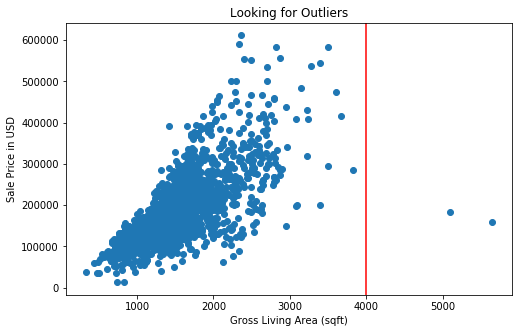

In [525]:
#Look for outliers 
#inspired by the suggested plot in the data dictionary
plt.figure(figsize = (8,5))
plt.scatter(train['Gr Liv Area'],train['SalePrice'])
plt.title('Looking for Outliers')
plt.xlabel('Gross Living Area (sqft)')
plt.ylabel('Sale Price in USD')
plt.axvline(x=4000,c = 'r');

It appears there are two outliers that do not follow the upward trend past 4000 square feet. These two large homes sold for much less then the trend. Removing homes less than 4000 square feet should be considered. 

In [526]:
# Remove homes will sqaure footage greater than 4000. 
train[train['Gr Liv Area'] > 4000]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
960,908154235,60,RL,313.0,63887,0,IR3,Bnk,AllPub,Corner,...,0,480,Gd,NA,NA,0,1,2008,New,160000
1885,908154195,20,RL,128.0,39290,0,IR1,Bnk,AllPub,Inside,...,0,0,NA,NA,Elev,17000,10,2007,New,183850


In [527]:
#drop rows 960 and 1885
train.drop([960,1885], inplace = True)

# Data is considered clean

In [528]:
#export as csv
train.to_csv('datasets/clean.csv', index = False)

## Refer to next notebook EDA

# Linear Regression

In [81]:
#import LinearRegression
from sklearn.linear_model import LinearRegression

#set X and y values
y = train['SalePrice']
X = train[['Gr Liv Area','Year Built']]

#instatiate model
model = LinearRegression()

#fit model
model.fit(X,y)

#generate predictions
y_predict = model.predict(X)

In [444]:
test = pd.read_csv('datasets/test.csv')

In [86]:
test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [529]:
test_X = test[['Gr Liv Area','Year Built']]


In [531]:
test_X.shape

(878, 2)

In [ ]:
test_predict_y = model.predict(test_X)

In [97]:
submission = pd.DataFrame()

In [98]:
submission['Id'] = test['Id']

In [99]:
submission['SalePrice'] = test_predict_y

In [100]:
submission.head()

,Id,SalePrice
0,2658,153424.986368
1,2718,230884.475038
2,2414,218943.444732
3,1989,78281.542687
4,625,162057.367738


In [103]:
submission.to_csv('Submissions/attempt1.csv',index=False)

In [ ]:
#root_mean_squared_error is the kaggle metric

In [ ]:
#sklearn imputation

In [ ]:
#don't use zip as quantitive variable, it is a classifier

In [ ]:
#sklearn label encoder changes into classes

In [ ]:
# sklearn label encoder